# <span style="color:#f37726">05 RKI Model Training</span>

**Ziele des Notebooks:**
- Maschinelle Lernmodelle auf den Trainingsdaten trainieren
- Modellparameter exportieren

In [1]:
# Benötigte Bibliotheken für dieses Notebook
from tensorflow import keras
import numpy as np
import pandas as pd
import xarray as xr

**MLP ohne Landkreisdaten**

In [2]:
# Daten laden
train_mlp = pd.read_pickle('data/train_mlp.pkl')

# Zufällige Anordnung
train_mlp = train_mlp.sample(frac=1)

# Trainings-, Validierungs- und Testdatensätze erstellen
X_train = train_mlp.drop('AnzahlFall',axis=1)
X_train = X_train.to_numpy()
y_train = train_mlp['AnzahlFall']
y_train = y_train.to_numpy()

In [3]:
# MLP modellieren
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=["mean_squared_error"],
                )

In [4]:
# Train mlp
fitted_mlp_model = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3556/3556 [==============================] - 3s 601us/step - loss: 555.5363 - mean_squared_error: 555.5363
Epoch 2/30
3556/3556 [==============================] - 2s 571us/step - loss: 421.9158 - mean_squared_error: 421.9158
Epoch 3/30
3556/3556 [==============================] - 2s 577us/step - loss: 379.4702 - mean_squared_error: 379.4702
Epoch 4/30
3556/3556 [==============================] - 2s 616us/step - loss: 372.8515 - mean_squared_error: 372.8515
Epoch 5/30
3556/3556 [==============================] - 2s 534us/step - loss: 374.3440 - mean_squared_error: 374.3440
Epoch 6/30
3556/3556 [==============================] - 2s 554us/step - loss: 334.9149 - mean_squared_error: 334.9149
Epoch 7/30
3556/3556 [==============================] - 2s 609us/step - loss: 377.6822 - mean_squared_error: 377.6822
Epoch 8/30
3556/3556 [==============================] - 2s 663us/step - loss: 339.8902 - mean_squared_error: 339.8902
Epoch 9/30
3556/3556 [==============================] - 

In [5]:
model.save('models/mlp.h5')

**MLP mit den Ergebnissen des Clusterings**

In [6]:
# Daten laden
train_mlp_mit = pd.read_pickle('data/train_mlp_mit.pkl')

display(train_mlp_mit)

# Zufällige Anordnung
train_mlp_mit = train_mlp_mit.sample(frac=1)

# Trainings-, Validierungs- und Testdatensätze erstellen
X_train = train_mlp_mit.drop('AnzahlFall',axis=1)
X_train = X_train.to_numpy()
y_train = train_mlp_mit['AnzahlFall']
y_train = y_train.to_numpy()

,AnzahlFall,AnzahlFall_Vortag,AnzahlFall_Vorzweitag,AnzahlFall_Vordreitag,AnzahlFall_Vorviertag,AnzahlFall_Vorfünftag,AnzahlFall_Vorsechstag,AnzahlFall_Vorwoche,Dienstag,Donnerstag,...,is_kmeans_cluster_6,is_kmeans_cluster_7,is_agglo_cluster_0,is_agglo_cluster_1,is_agglo_cluster_2,is_agglo_cluster_3,is_agglo_cluster_4,is_agglo_cluster_5,is_agglo_cluster_6,is_agglo_cluster_7
0,4,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,4,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,4,2,0,0,0,4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2,4,2,0,0,0,4,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2,4,2,0,0,0,4,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113783,27,47,26,50,38,16,23,16,0,0,...,0,0,0,0,0,0,1,0,0,0
113784,9,27,47,26,50,38,16,23,0,0,...,0,0,0,0,0,0,1,0,0,0
113785,29,9,27,47,26,50,38,16,0,0,...,0,0,0,0,0,0,1,0,0,0
113786,38,29,9,27,47,26,50,38,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# MLP modellieren
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=["mean_squared_error"],
                )

In [8]:
# Train mlp
fitted_mlp_model = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3556/3556 [==============================] - 2s 546us/step - loss: 646.4334 - mean_squared_error: 646.4334
Epoch 2/30
3556/3556 [==============================] - 2s 546us/step - loss: 386.1932 - mean_squared_error: 386.1932
Epoch 3/30
3556/3556 [==============================] - 2s 549us/step - loss: 371.7048 - mean_squared_error: 371.7048
Epoch 4/30
3556/3556 [==============================] - 2s 548us/step - loss: 377.2528 - mean_squared_error: 377.2528
Epoch 5/30
3556/3556 [==============================] - 2s 553us/step - loss: 379.1411 - mean_squared_error: 379.1411
Epoch 6/30
3556/3556 [==============================] - 2s 546us/step - loss: 369.6313 - mean_squared_error: 369.6313
Epoch 7/30
3556/3556 [==============================] - 2s 546us/step - loss: 400.7871 - mean_squared_error: 400.7871
Epoch 8/30
3556/3556 [==============================] - 2s 549us/step - loss: 377.9451 - mean_squared_error: 377.9451
Epoch 9/30
3556/3556 [==============================] - 

In [9]:
model.save('models/mlp_mit.h5')

**RNN**

In [10]:
# Daten laden
train_rnn = pd.read_pickle('data/train_rnn.pkl')

In [11]:
display(train_rnn)

AnzahlFall  AnzahlFall_Vortag  AnzahlFall_Vorzweitag  \
IdLandkreis Meldedatum                                                         
1001        2020-03-01    0.000000           0.000000               0.000000   
            2020-03-02    0.000000           0.000000               0.000000   
            2020-03-03    0.000000           0.000000               0.000000   
            2020-03-04    0.000000           0.000000               0.000000   
            2020-03-05    0.000000           0.000000               0.000000   
...                            ...                ...                    ...   
16077       2021-03-27    0.176471           0.307190               0.169935   
            2021-03-28    0.058824           0.176471               0.307190   
            2021-03-29    0.189542           0.058824               0.176471   
            2021-03-30    0.248366           0.189542               0.058824   
            2021-03-31    0.516340           0.248366               0.189542   

                        AnzahlFall_Vordreitag  AnzahlFall_Vorviertag  \
IdLandkreis Meldedatum                                                 
1001        2020-03-01               0.000000               0.000000   
            2020-03-02               0.000000               0.000000   
            2020-03-03               0.000000               0.000000   
            2020-03-04               0.000000               0.000000   
            2020-03-05               0.000000               0.000000   
...                                       ...                    ...   
16077       2021-03-27               0.326797               0.248366   
            2021-03-28               0.169935               0.326797   
            2021-03-29               0.307190               0.169935   
            2021-03-30               0.176471               0.307190   
            2021-03-31               0.058824               0.176471   

                        AnzahlFall_Vorfünftag  AnzahlFall_Vorsechstag  \
IdLandkreis Meldedatum                                                  
1001        2020-03-01               0.000000                0.000000   
            2020-03-02               0.000000                0.000000   
            2020-03-03               0.000000                0.000000   
            2020-03-04               0.000000                0.000000   
            2020-03-05               0.000000                0.000000   
...                                       ...                     ...   
16077       2021-03-27               0.104575                0.150327   
            2021-03-28               0.248366                0.104575   
            2021-03-29               0.326797                0.248366   
            2021-03-30               0.169935                0.326797   
            2021-03-31               0.307190                0.169935   

                        AnzahlFall_Vorwoche  
IdLandkreis Meldedatum                       
1001        2020-03-01             0.000000  
            2020-03-02             0.000000  
            2020-03-03             0.000000  
            2020-03-04             0.000000  
            2020-03-05             0.000000  
...                                     ...  
16077       2021-03-27             0.104575  
            2021-03-28             0.150327  
            2021-03-29             0.104575  
            2021-03-30             0.248366  
            2021-03-31             0.326797  

[158796 rows x 8 columns]

In [12]:
X_train = train_rnn.drop('AnzahlFall', axis=1, inplace=False)
y_train = train_rnn['AnzahlFall']
X_train = X_train.to_xarray().to_array()
y_train = y_train.to_xarray()
X_train = X_train.transpose('IdLandkreis', 'Meldedatum', 'variable')
X_train = X_train.values
y_train = y_train.values

print(X_train.shape)s

(401, 396, 7)
(401, 396)


In [13]:
X_train = X_train.reshape(-1, X_train.shape[2])
X_train = np.expand_dims(X_train, axis=2)
y_train = y_train.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)

(158796, 7, 1)
(158796, 1)


In [18]:
# Netzarchitektur

model = keras.models.Sequential()
model.add(keras.layers.LSTM(30, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error',
              optimizer="adam",
              metrics=["mean_absolute_error"],
                )

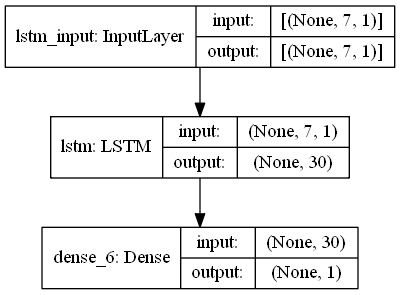

In [19]:
keras.utils.plot_model(model, "visualization/rnn_architecture.png", show_shapes=True)

In [20]:
fitted_rnn_model = model.fit(X_train, y_train, epochs=100, verbose=1, shuffle=False)

Epoch 1/100
4963/4963 [==============================] - 13s 2ms/step - loss: 0.0680 - mean_absolute_error: 0.0680
Epoch 2/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.0625 - mean_absolute_error: 0.0625
Epoch 3/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.0607 - mean_absolute_error: 0.0607
Epoch 4/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.0596 - mean_absolute_error: 0.0596
Epoch 5/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.0591 - mean_absolute_error: 0.0591
Epoch 6/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.0587 - mean_absolute_error: 0.0587
Epoch 7/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.0585 - mean_absolute_error: 0.0585
Epoch 8/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.0583 - mean_absolute_error: 0.0583
Epoch 9/100
4963/4963 [==============================] - 11s 2ms/step - loss: 0.

In [21]:
model.save('models/rnn.h5')